# LOAN PREDICTION APPLICATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

trainingDataset = pd.read_csv("train_LoanPrediction.csv")
testingDataset = pd.read_csv("test_LoanPrediction.csv")
print (trainingDataset.head())
combined = pd.concat([trainingDataset, testingDataset],ignore_index=True, sort=False)
print (combined.shape)
print (combined.columns)
y = trainingDataset['Loan_Status']

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [20]:
!pip install matplotlib
!pip install seaborn

In [2]:
print ("TRAINING DATA DETAILS")
print ("Total  number of records present in the dataset -", trainingDataset.shape[0])
print ("Total  number of columns present in the dataset -", trainingDataset.shape[1])

print ("\n TESTING DATA DETAILS")
print ("Total  number of records present in the dataset -", testingDataset.shape[0])
print ("Total  number of columns present in the dataset -", testingDataset.shape[1])

TRAINING DATA DETAILS
Total  number of records present in the dataset - 614
Total  number of columns present in the dataset - 13

 TESTING DATA DETAILS
Total  number of records present in the dataset - 367
Total  number of columns present in the dataset - 12


In [3]:
print ("Following are the columns present in the dataset - ", trainingDataset.columns)
print (trainingDataset.dtypes)

Following are the columns present in the dataset -  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [4]:
print ("TOTAL NUMBER OF RECORDS IN THE COMBINED DATASET  - ", combined.shape[0])
print ("\n")
categoricalColNames = combined.iloc[:,1:].select_dtypes(include=['object'])
requiredCategoricalVariables = list(categoricalColNames.columns.values)
for x in requiredCategoricalVariables:
    print ("Number of value counts for -", x)
    print (combined[x].value_counts())
    print ('Number of Missing values: %d'% sum(combined[x].isnull()))
    print ("\n")
    
numericalColNames = combined.iloc[:,1:].select_dtypes(include=['int64','float64'])
requiredCategoricalVariables = list(numericalColNames.columns.values)
for x in requiredCategoricalVariables:
    print ('Number of missing values in ', x ,': %d'% sum(combined[x].isnull()))


TOTAL NUMBER OF RECORDS IN THE COMBINED DATASET  -  981


Number of value counts for - Gender
Gender
Male      775
Female    182
Name: count, dtype: int64
Number of Missing values: 24


Number of value counts for - Married
Married
Yes    631
No     347
Name: count, dtype: int64
Number of Missing values: 3


Number of value counts for - Dependents
Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64
Number of Missing values: 25


Number of value counts for - Education
Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64
Number of Missing values: 0


Number of value counts for - Self_Employed
Self_Employed
No     807
Yes    119
Name: count, dtype: int64
Number of Missing values: 55


Number of value counts for - Property_Area
Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64
Number of Missing values: 0


Number of value counts for - Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64
N

In [5]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [6]:
### FILLING THE MISSING VALUES IN THE REQUIRED COLUMNS
combined['LoanAmount'].fillna(combined['LoanAmount'].mean(), inplace=True)
combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].mean(), inplace=True)
combined['Self_Employed'].fillna('No',inplace=True)
combined['Married'].fillna('NA',inplace=True)
combined['Gender'].fillna('NA',inplace=True)
combined['Dependents'].fillna('0',inplace=True)
combined['Credit_History'].fillna(0,inplace=True)

In [26]:
requiredColumns = list(combined.columns.values)
print ("Checking if there are any missing values in the dataset - ")
for col in requiredColumns:
    print ("column name  -", col)
    print ('Final #missing: %d'% sum(combined[col].isnull()))
    print ("\n")

Checking if there are any missing values in the dataset - 
column name  - Loan_ID
Final #missing: 0


column name  - Gender
Final #missing: 0


column name  - Married
Final #missing: 0


column name  - Dependents
Final #missing: 0


column name  - Education
Final #missing: 0


column name  - Self_Employed
Final #missing: 0


column name  - ApplicantIncome
Final #missing: 0


column name  - CoapplicantIncome
Final #missing: 0


column name  - LoanAmount
Final #missing: 0


column name  - Loan_Amount_Term
Final #missing: 0


column name  - Credit_History
Final #missing: 0


column name  - Property_Area
Final #missing: 0


column name  - Loan_Status
Final #missing: 367




In [7]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(combined.iloc[:, 2:].corr(), annot=True, square=True, cmap='BuPu')
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 1200x1200 with 0 Axes>

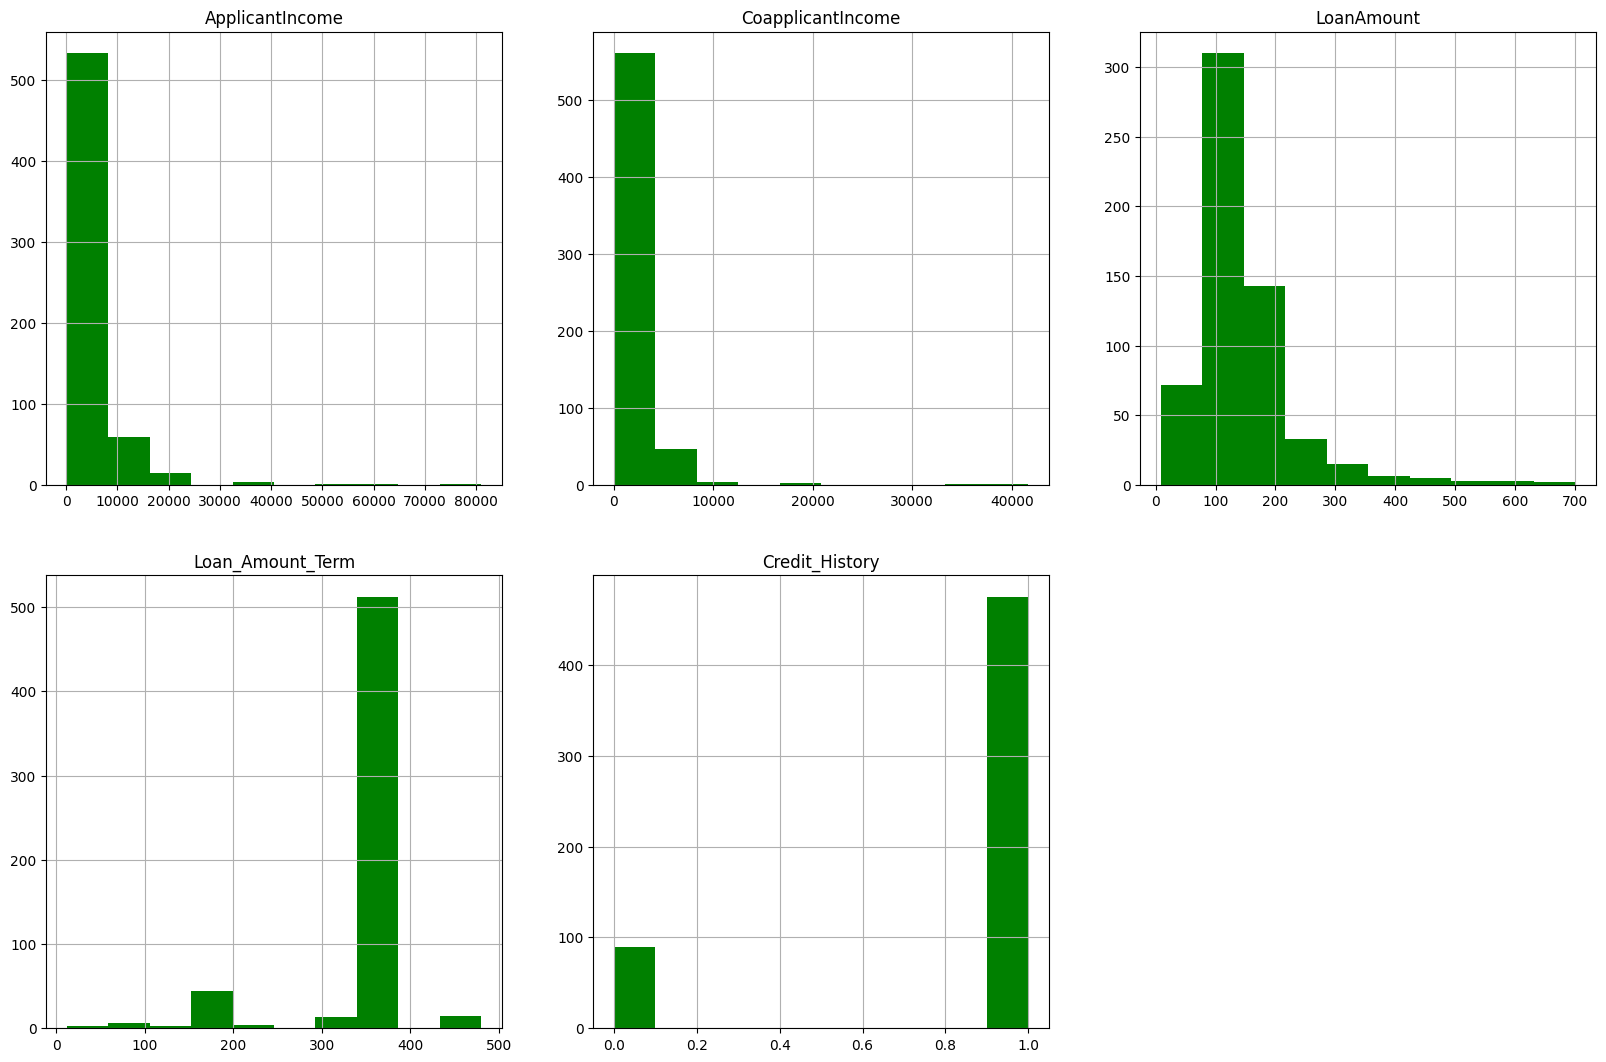

In [9]:

plt.figure(figsize=(20,20))
temp = trainingDataset.iloc[:,2:].select_dtypes(include=['int64','float64'])
requiredColumns = list(temp.columns.values)
counter = 1
for col in requiredColumns:
    plt.subplot(3, 3, counter)
    trainingDataset[col].hist(color = 'green')
    plt.title(col)
    counter = counter + 1
   

### Lets understand the distributions of ApplicantIncome and LoanAmount. Also Lets understand the categorical variables in more detail

<Axes: xlabel='Credit_History'>

<Figure size 1000x1000 with 0 Axes>

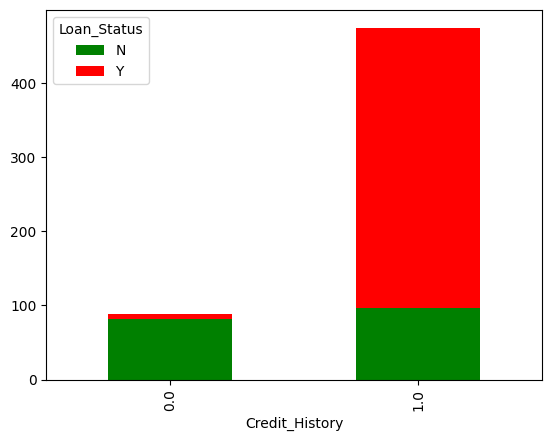

In [10]:
plt.figure(figsize=(10,10))
temp3 = pd.crosstab(trainingDataset['Credit_History'], trainingDataset['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

In [25]:
nrow_train = trainingDataset.shape[0]
X_train = combined[:nrow_train]
X_test = combined[nrow_train:]
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.fit_transform(X_test[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


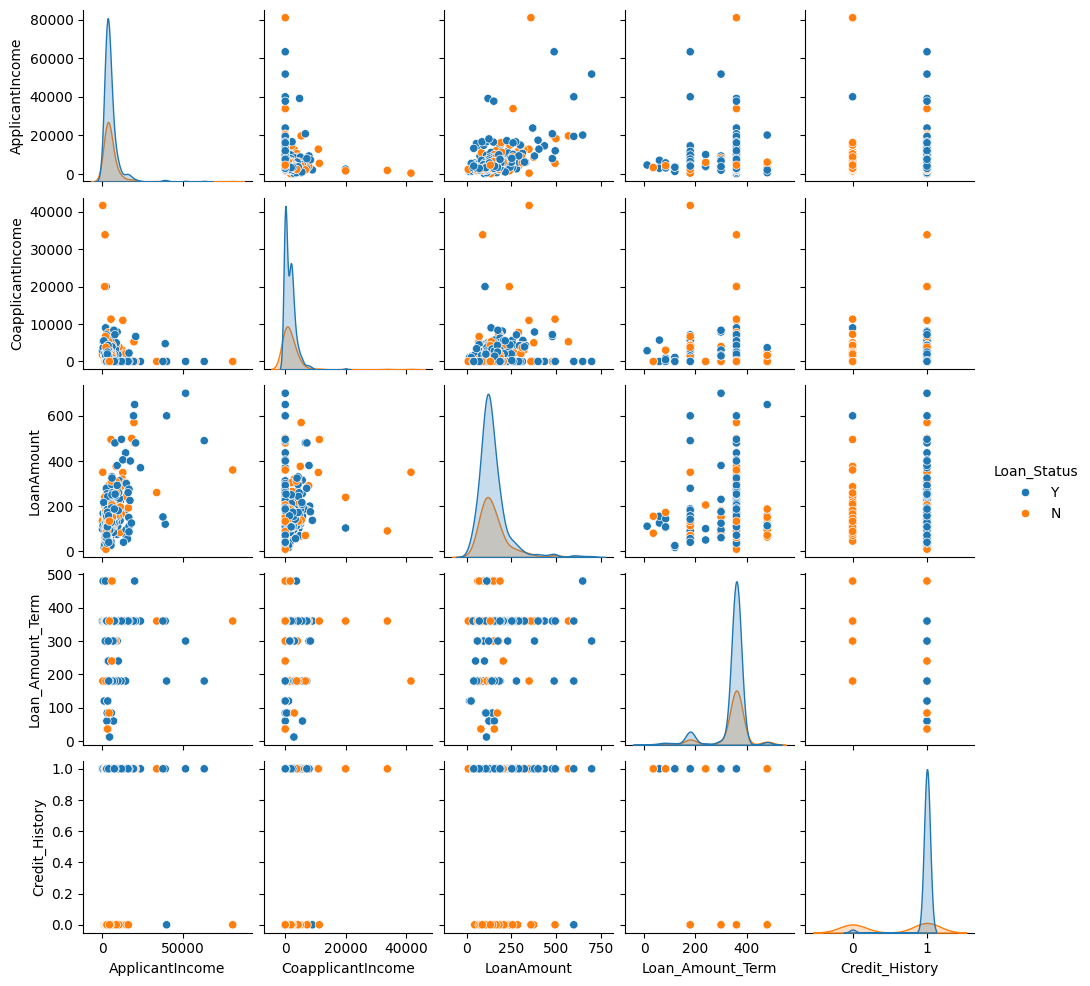

In [26]:
sns.pairplot(trainingDataset[trainingDataset.columns.values], hue='Loan_Status', diag_kind='kde', height=2);

<Axes: >

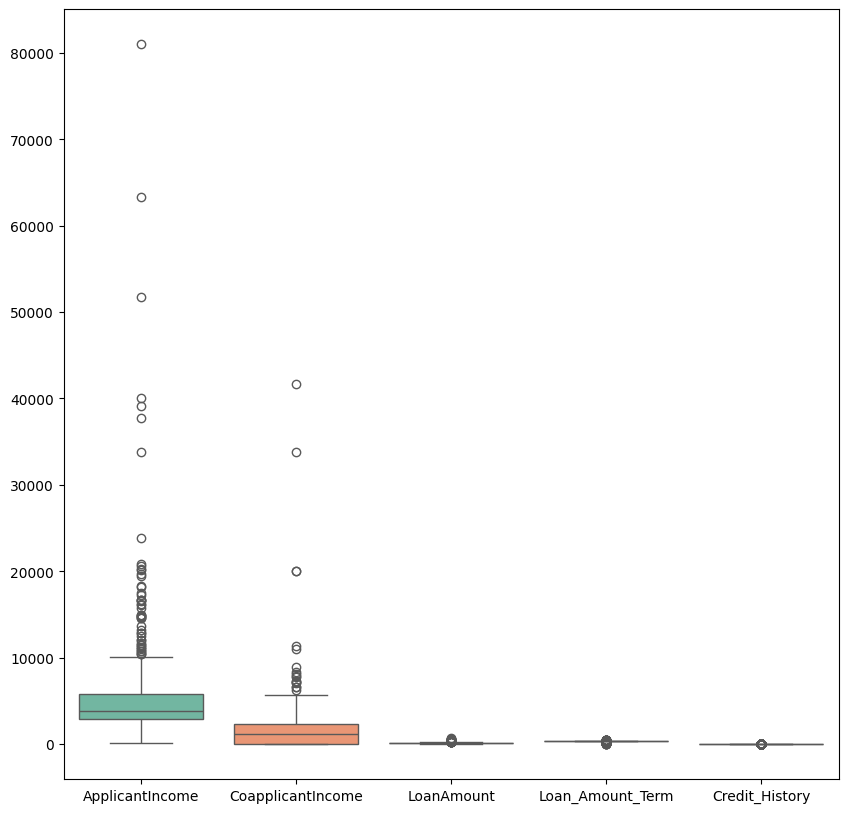

In [27]:
### THE BOX PLOT SHOW THE OUTLIERS IN YOUR DATA. 
### AS YOU CAN SEE COLUMNS NAMED "APPLICANT INCOME" AND "CO APPLICANT INCOME" HAVE OUTLIERS
temp = trainingDataset.iloc[:,2:].select_dtypes(include=['int64','float64'])
requiredColumns = list(temp.columns.values)
plt.figure(figsize=(10,10))
#trainingDataset[trainingDataset.columns.values].plot.box();
sns.boxplot(data=X_train[requiredColumns], palette="Set2")

## The above diagram tells us that there are outliers in columns such as "Applicant Income" and "Co Applicant Income"

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation

from sklearn import metrics
X = X_train.iloc[:, 2:11].values
y = X_train.iloc[:, 12].values
#X = X.reshape(X.shape[0],1)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.20, random_state=0)

LR_model = LogisticRegression(solver='sag')
LR_model.fit(X_tr,y_tr)
#Make predictions on training set:
predictions = LR_model.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (LR_model, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")


Accuracy : 73.171%

 Classification report for classifier LogisticRegression(solver='sag'):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123


Confusion matrix:
[[ 0 33]
 [ 0 90]]
TOTAL NUMBER OF TESTING RECORD -  123
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  90


TESTING RECORD -  [1.000e+00 0.000e+00 0.000e+00 1.000e+00 7.085e+03 0.000e+00 8.400e+01
 3.600e+02 1.000e+00]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [2.000e+00 0.000e+00 0.000e+00 0.000e+00 6.133e+03 3.906e+03 3.240e+02
 3.600e+02 1.000e+00]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [2.000e+00 2.000e+00 0.000e+00 0.000e+00 2.708e+03 1.167e+03 9.700e+0

In [29]:
temp = trainingDataset.iloc[:,2:11]
requiredColumns = list(temp.columns.values)
print (requiredColumns)
FinalData = list(zip(X_te, y_te, predictions))
print (FinalData[0])
my_submission = pd.DataFrame( X_te, columns=[requiredColumns])
my_submission['Actual_Loan_Status'] = y_te
my_submission['Predicted_Loan_Status'] = predictions
my_submission.head()
my_submission.to_csv('LoanPredictionSubmissions.csv', index=False)


['Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 7.085e+03, 0.000e+00,
       8.400e+01, 3.600e+02, 1.000e+00]), 1, 1)


In [30]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation

from sklearn import metrics

model = LogisticRegression(solver='sag')
X = X_train.iloc[:, 10:11].values
y = X_train.iloc[:, 12].values
#X = X.reshape(X.shape[0],1)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.25,random_state=0)

model.fit(X_tr,y_tr)
#Make predictions on training set:
predictions = model.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier LogisticRegression(solver='sag'):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 


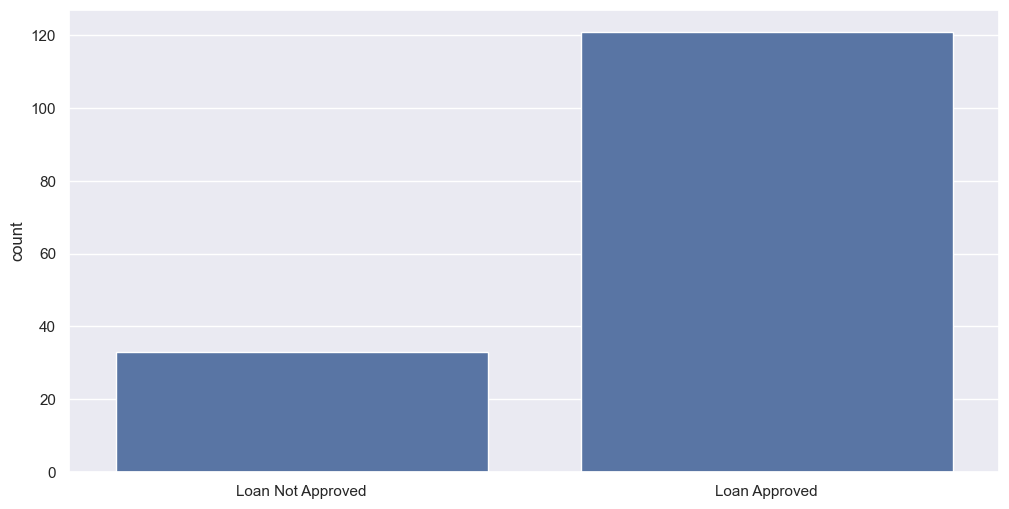

In [31]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x=predictions)
ax.set_xticklabels(["Loan Not Approved","Loan Approved"])
print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_tr,y_tr)
predictions = rf_model.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier LogisticRegression(solver='sag'):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 


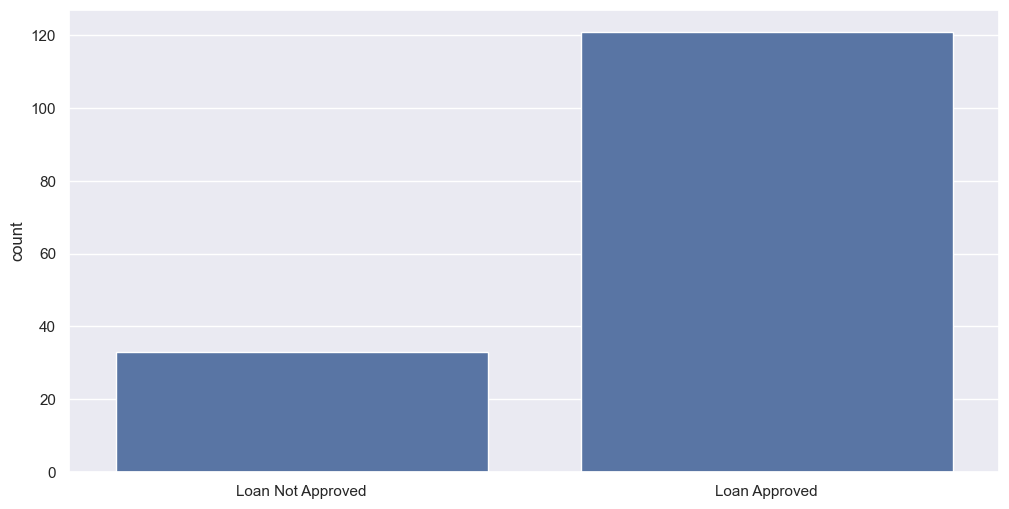

In [33]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x=predictions)
ax.set_xticklabels(["Loan Not Approved","Loan Approved"])
print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")

In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_tr,y_tr)
predictions = clf.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr,y_tr)
predictions = knn.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
